In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor # for building random forest models
from sklearn.preprocessing import StandardScaler # for data preprocessing
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import mean_squared_error

In [4]:
# Load the data
train_data = pd.read_csv("playground-series-s3e1/train.csv") # load training data
test_data = pd.read_csv("playground-series-s3e1/test.csv") # load test data

In [5]:
train_data.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [6]:
test_data.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [7]:
print('the total rows in the train data are =', train_data.shape[0])

the total rows in the train data are = 37137


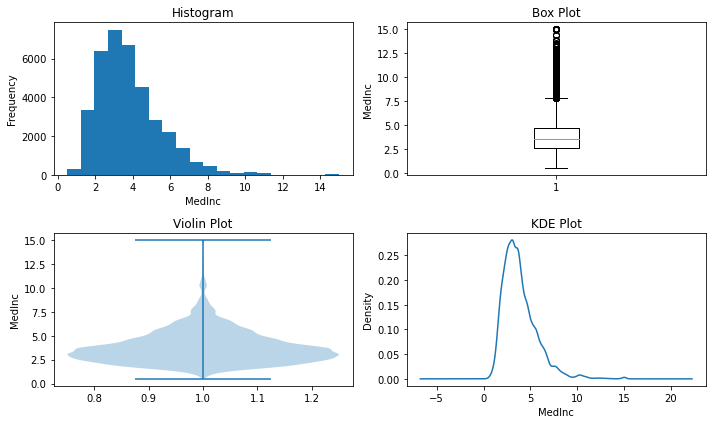

In [8]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(train_data['MedInc'], bins=20)
plt.xlabel('MedInc')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.subplot(2, 2, 2)
plt.boxplot(train_data['MedInc'])
plt.ylabel('MedInc')
plt.title('Box Plot')
plt.subplot(2, 2, 3)
plt.violinplot(train_data['MedInc'])
plt.ylabel('MedInc')
plt.title('Violin Plot')
plt.subplot(2, 2, 4)
train_data['MedInc'].plot.kde()
plt.xlabel('MedInc')
plt.title('KDE Plot')
plt.tight_layout()
plt.show()

In [9]:
train_data['MedInc'].describe()

count    37137.000000
mean         3.851029
std          1.803167
min          0.499900
25%          2.602300
50%          3.515600
75%          4.699700
max         15.000100
Name: MedInc, dtype: float64

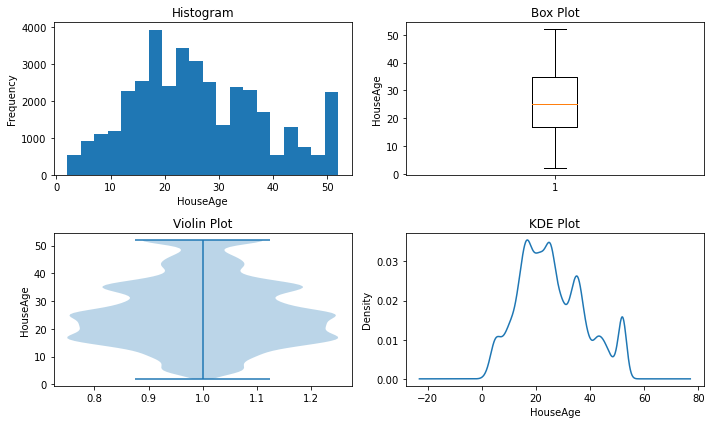

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(train_data['HouseAge'], bins=20)
plt.xlabel('HouseAge')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.subplot(2, 2, 2)
plt.boxplot(train_data['HouseAge'])
plt.ylabel('HouseAge')
plt.title('Box Plot')
plt.subplot(2, 2, 3)
plt.violinplot(train_data['HouseAge'])
plt.ylabel('HouseAge')
plt.title('Violin Plot')
plt.subplot(2, 2, 4)
train_data['HouseAge'].plot.kde()
plt.xlabel('HouseAge')
plt.title('KDE Plot')
plt.tight_layout()
plt.show()

In [11]:
train_data['HouseAge'].describe()

count    37137.000000
mean        26.057005
std         12.158221
min          2.000000
25%         17.000000
50%         25.000000
75%         35.000000
max         52.000000
Name: HouseAge, dtype: float64

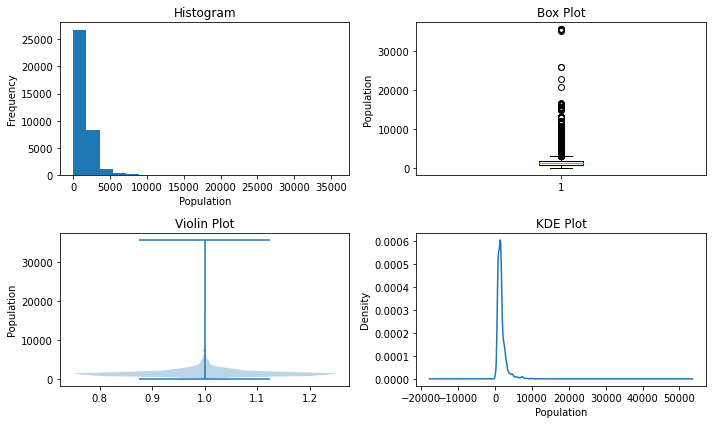

In [12]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(train_data['Population'], bins=20)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.subplot(2, 2, 2)
plt.boxplot(train_data['Population'])
plt.ylabel('Population')
plt.title('Box Plot')
plt.subplot(2, 2, 3)
plt.violinplot(train_data['Population'])
plt.ylabel('Population')
plt.title('Violin Plot')
plt.subplot(2, 2, 4)
train_data['Population'].plot.kde()
plt.xlabel('Population')
plt.title('KDE Plot')
plt.tight_layout()
plt.show()

In [13]:
import folium
from folium.plugins import HeatMap
map = folium.Map(location=[train_data['Latitude'].mean(), train_data['Longitude'].mean()], zoom_start=10)
coordinates = list(zip(train_data['Latitude'], train_data['Longitude']))
HeatMap(coordinates).add_to(map)
map

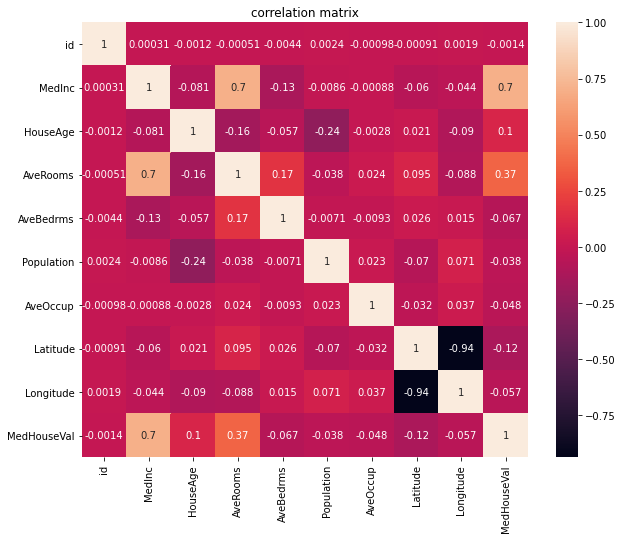

In [14]:
plt.figure(figsize = (10,8))
plt.title('correlation matrix')
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [15]:
train_data.drop('AveRooms', axis=1, inplace=True)

In [16]:
train_data.head()

,id,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [18]:
# Separate target variable from features
y_train = train_data['MedHouseVal']
x_train = train_data.drop(['MedHouseVal', 'id'], axis=1)
x_test = test_data.drop(['id', 'AveRooms'], axis=1)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

# Scale features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.fit_transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [21]:
from sklearn.ensemble import RandomForestRegressor

train_mse = []
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for i in n_estimators:
    clf = RandomForestRegressor(n_estimators=i)
    clf.fit(x_train_scaled, y_train)
    pred = clf.predict(x_train_scaled)
    mse = mean_squared_error(y_train, pred)
    train_mse.append(mse)
    print('Train error for n_estimators =', i, 'is', mse)

Train error for n_estimators = 10 is 0.06888461611890172
Train error for n_estimators = 20 is 0.05737584550805395
Train error for n_estimators = 30 is 0.0547649409023446
Train error for n_estimators = 40 is 0.05291416857575547
Train error for n_estimators = 50 is 0.05140098248321305
Train error for n_estimators = 60 is 0.05060682897086807
Train error for n_estimators = 70 is 0.05012070626264806
Train error for n_estimators = 80 is 0.04993547979629371
Train error for n_estimators = 90 is 0.04940732039922565
Train error for n_estimators = 100 is 0.04886194806121225


In [22]:
from sklearn.ensemble import RandomForestRegressor

val_mse = []
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for i in n_estimators:
    clf = RandomForestRegressor(n_estimators=i)
    clf.fit(x_val_scaled, y_val)
    pred = clf.predict(x_val_scaled)
    mse = mean_squared_error(y_val, pred)
    val_mse.append(mse)
    print('val error for n_estimators =', i, 'is', mse)

val error for n_estimators = 10 is 0.07664481951878341
val error for n_estimators = 20 is 0.06285420520090752
val error for n_estimators = 30 is 0.0578135101399309
val error for n_estimators = 40 is 0.05660553137130474
val error for n_estimators = 50 is 0.054539631373061545
val error for n_estimators = 60 is 0.0557195315414513
val error for n_estimators = 70 is 0.054991397111885075
val error for n_estimators = 80 is 0.0542151573861712
val error for n_estimators = 90 is 0.0537738449870558
val error for n_estimators = 100 is 0.054666568808201796


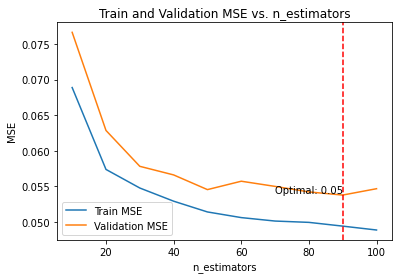

In [23]:
plt.plot(n_estimators, train_mse, label='Train MSE')
plt.plot(n_estimators, val_mse, label='Validation MSE')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('Train and Validation MSE vs. n_estimators')
plt.legend()
optimal_index = val_mse.index(min(val_mse))
optimal_n_estimators = n_estimators[optimal_index]
optimal_mse = val_mse[optimal_index]
plt.axvline(x=optimal_n_estimators, color='r', linestyle='--', label='Optimal MSE')
plt.text(optimal_n_estimators, optimal_mse, f'Optimal: {optimal_mse:.2f}', ha='right', va='bottom')
plt.show()

In [24]:
# Build the random forest model
clf = RandomForestRegressor(n_estimators=90)
clf.fit(x_train_scaled, y_train)
y_pred = clf.predict(x_test_scaled)

In [25]:
# Prepare the Kaggle submission file
submission = pd.DataFrame({'Id': test_data['id'], 'MedHouseVal': y_pred})
submission.head()

,Id,MedHouseVal
0,37137,0.613156
1,37138,0.832056
2,37139,3.342856
3,37140,3.719913
4,37141,3.742489


In [26]:
submission.to_csv('submission_RF_python.csv', index=False)